## Stochastic Gradient Descent

Tal y como hemos visto, la regresión lineal tiene un problema de escalabilidad derivado de cómo se calculan sus parámetros $\beta$. El uso de operaciones matriciales para obtener la recta de regresión que minimiza los errores implica operaciones computacionalmente pesadas. El **descenso de gradiente estocástico**, o *Stochastic Gradient Descent (SGD)*, es un método de regresión (aunque puede aplicarse también a clasificación como veremos más adelante) que permite obtener resultados similares a los de la regresión lineal, pero de forma escalable.

Se fundamenta en la técnica de **descenso de gradiente** un método de optimización que permite obtener los valores de los parámetros de una función que la hacen mínima. Recordamos que la regresión lineal podía plantearse como el siguiente problema de optimización (nótese el cambio de nomenclatura de $\beta$ a $w$ para coincidir con el resto de literatura sobre el tema):

$$
\min_w \sum_{i=1}^n \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)^2
$$

Para poder optimizar la función mediante el descenso de gradiente debemos encontrar las derivadas parciales respecto de $w_0, w_1, \dots, w_m$. Por simplificar, estas ecuaciones se han obtenido para la muestra $x_i$:

$$
\frac{\partial}{\partial w_0} = - 2 \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

$$
\frac{\partial}{\partial w_1} = - 2 \cdot x_{i,1} \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

$$
\frac{\partial}{\partial w_2} = - 2 \cdot x_{i,2} \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

$$
\cdots
$$

$$
\frac{\partial}{\partial w_m} = - 2 \cdot x_{i,m} \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

En general, para cualquier $k \neq 0$:

$$
\frac{\partial}{\partial w_k} = - 2 \cdot x_{i,k} \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

El algoritmo del descenso de gradiente recorrerá el conjunto de datos un número predeterminado de iteraciones y, para cada muestra $x_i$ procederá a actualizar los parametros $w$ de acuerdo con las siguientes experesiones:

$$
w_0 \leftarrow w_0 + \gamma \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

$$
w_k \leftarrow w_k + \gamma \cdot x_{i,k} \cdot \left( y_i - \left( w_0 + w_1 \cdot x_{i,1} + \cdots + w_m \cdot x_{i,m} \right) \right)
$$

Resaltar que se ha incluido un híper-parámetro $\gamma$ conocido como *learning rate* o **factor de aprendizaje** que controla la velocidad del aprendizaje. Un valor alto en dicho parámetro implicará aprendizajes rápidos, pero poco precisos, mientras que un valor bajo implicará un aprendizaje lento y la posibilidad de quedar atrapado en un mínimo local.

El método anterior puede ser también aplicado a la regresión línea con regularización (Ridge, Lasso o ElasticNet) añadiendo un coeficiente de regularización y actualizando derivadas y ecuaciones de actualización.

Como hemos dicho, el descenso de gradiente estocástico funciona como un descenso de gradiente básico con la única salvedad de que en *SGD* se calcula dicho gradiente con un único punto de datos en lugar de hacerlo con todos los puntos del conjunto de datos. Es decir, en lugar de recorrer todo el conjunto de datos en cada iteración, el algoritmo elige un único punto y actualiza los parámetros $w$ como si ese punto representase a todo el conjunto de datos. Con esto conseguimos que, si bien el método necesita de más iteraciones para converger a un óptimo, el coste computacional de cada una de estas iteraciones es considerablemente inferior a una iteración del descenso de gradiente básico.

Es por ello por lo que se recomienda este método de regresión lineal cuando se tienen conjunto de datos con muchas observaciones (generalmente más de 10k puntos de entrenamiento).

Al tratarse de un método iterativo podemos ilustrar el proceso de aprendizaje de la regresión sobre el siguiente conjunto de puntos haciendo uso del modelo `linear_model.SGDRegressor` de la librería `sklearn`:

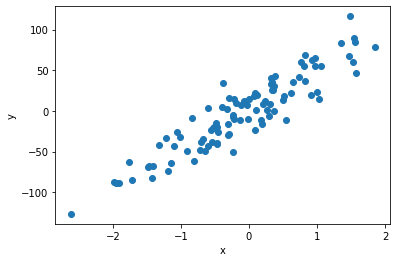

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=1, noise=20.0, random_state=42)

plt.figure()

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X,y)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Con

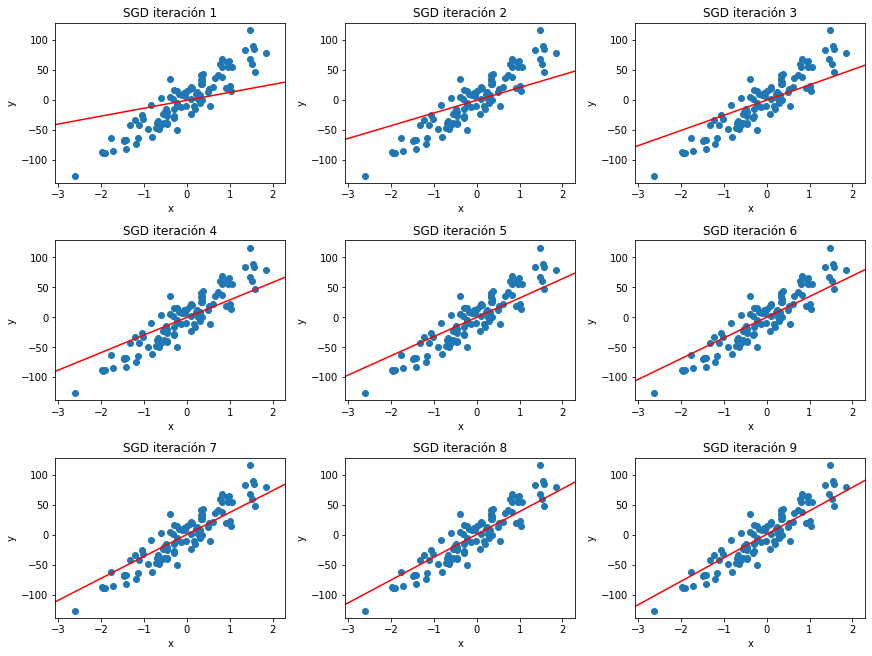

In [2]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from math import floor

def plot_regression(X, y, axs, max_iter):
  row = floor((max_iter-1) / 3)
  col = (max_iter-1) % 3

  min = np.amin(X)
  max = np.amax(X)

  diff = max-min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  reg = SGDRegressor(max_iter=max_iter, random_state=43)
  reg.fit(X, y)

  axs[row,col].set_title('SGD iteración ' + str(max_iter))
  axs[row,col].set_xlabel('x')
  axs[row,col].set_ylabel('y')

  axs[row,col].set_xlim(min, max)

  axs[row,col].scatter(X,y)

  line = np.linspace(min, max)
  axs[row,col].plot(line, reg.intercept_ + line * reg.coef_, c='red')

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,9), constrained_layout=True)

for max_iter in range(1,10):
  plot_regression(X, y, axs, max_iter)

El `SGDRegressor` también es compatible con la regresión polinómica al poder hacer uso de `PolynomialFeatures` como paso previo al cómputo de la regresión.

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es) y **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">